In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound

sim = rebound.Simulation()
sim.start_server(port=1234)

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import rebound
import time
import numpy as np
import random

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

def show_progress(i):
    # shows progress during long simulations
    print(".", end="", flush=True)
    if not (i+1)%80:
        print() # start a new line
    return

# 1.

a)

In [20]:
def Z_1(s, m):
    return 1 + ((1 - (s/m)**2)**(1/3))*((1+ s/m)**(1/3) + (1 - s/m)**(1/3))

def Z_2(s, m):
    return np.sqrt(3*((s/m)**2) + (Z_1(s, m)**2))

def r_ISCO(s, m, orbit):

    Z1 = Z_1(s, m)
    Z2 = Z_2(s, m)
    
    if orbit=='prograde':
        risco = m*(3 + Z2 - np.sqrt((3 - Z1)*(3 + Z1 + 2*Z2)))

    if orbit=='retrograde':
        risco = m*(3 + Z2 + np.sqrt((3 - Z1)*(3 + Z1 + 2*Z2)))
        
    return risco

def r_event(m, s):

    return m + np.sqrt(m**2 - s**2)

In [21]:
M_dot = 1 # ?? units

r_g = M_dot # in natural units, G = c = 1, such that we have r_g = GM_dot/c^2 = M_dot
m = r_g # still, in natural units, we have m = GM_dot/c^2 = M_dot = r_g

s_space = np.linspace(0, 1, 100)
chi_space = s_space/m
r_event_space = r_event(m, s_space)

In [15]:
r_isco_prograde = r_ISCO(s_space, m, orbit='prograde')
r_isco_retrograde = r_ISCO(s_space, m, orbit='retrograde')

Text(0, 0.5, '$r_\\text{isco}/r_g$')

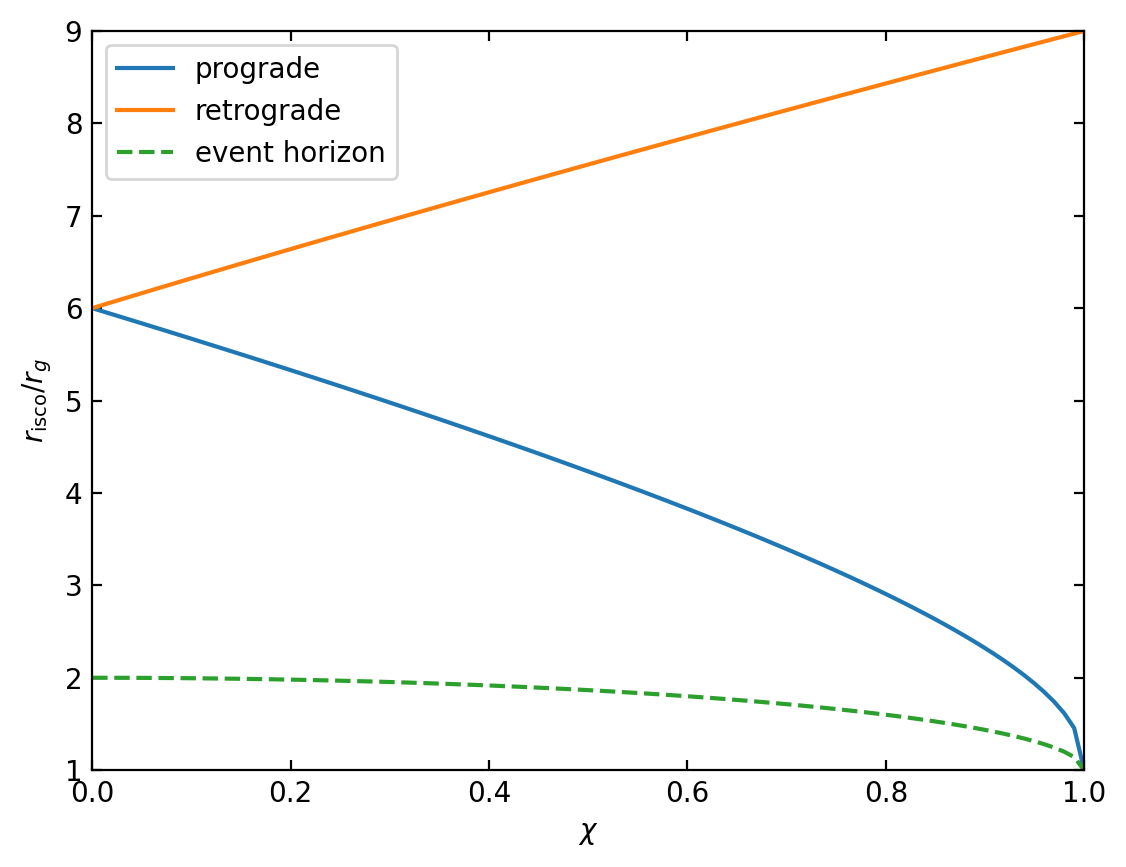

In [24]:
plt.plot(chi_space, r_isco_prograde/r_g, label = 'prograde')
plt.plot(chi_space, r_isco_retrograde/r_g, label = 'retrograde')
plt.plot(chi_space, r_event_space, '--', label = 'event horizon')

plt.xlim([0, 1])
plt.ylim([1, 9])

plt.legend()

plt.xlabel(r'$\chi$')
plt.ylabel(r'$r_\text{isco}/r_g$')

b)

In [26]:
def L_c(chi, orbit):
    if orbit=='prograde':
        Lc = 2 + 2*np.sqrt(1 - chi)
    if orbit=='retrograde':
        Lc = 2 + 2*np.sqrt(1 + chi)
    return Lc

def r_pc(L_C):
    return 0.5*r_g*((L_C)**2)

In [27]:
L_c_pro = L_c(chi_space, orbit='prograde')
L_c_retro = L_c(chi_space, orbit='retrograde')

r_p_pro = r_pc(L_c_pro)
r_p_retro = r_pc(L_c_retro)

Text(0, 0.5, '$r_p/r_g$')

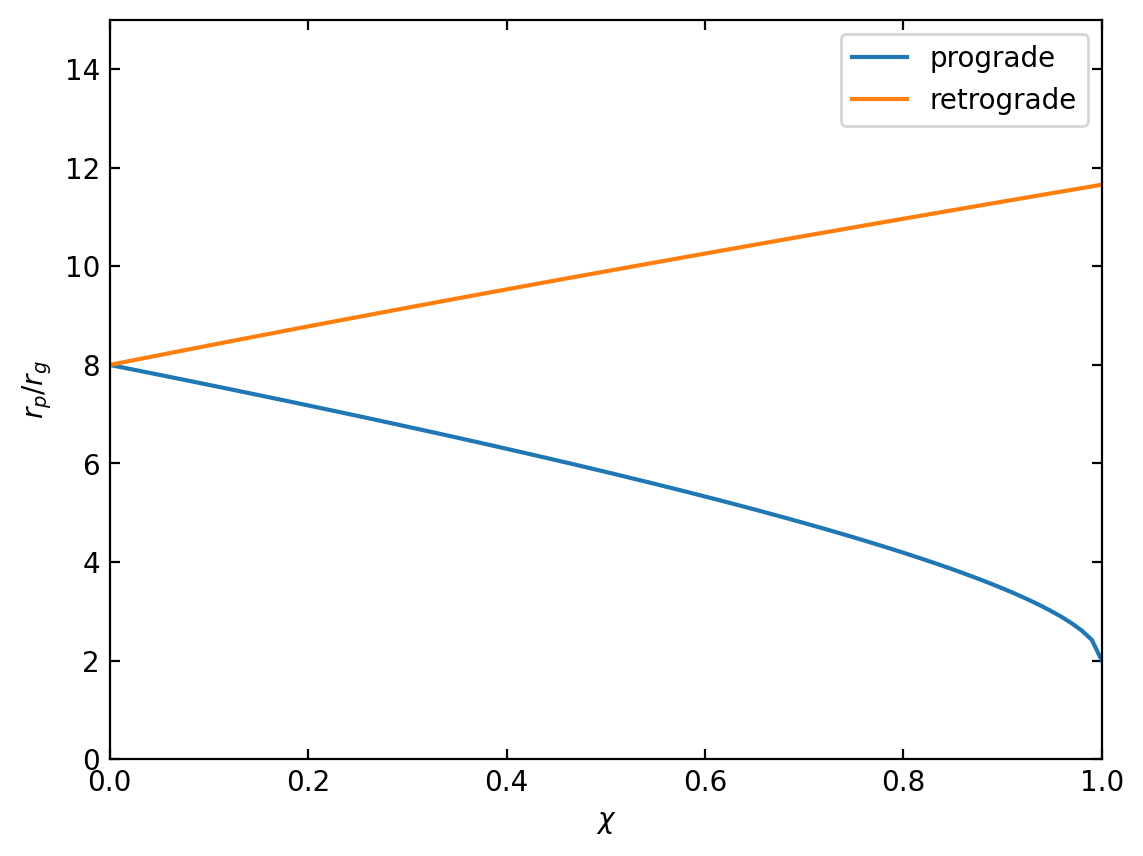

In [30]:
plt.plot(chi_space, r_p_pro/r_g, label='prograde')
plt.plot(chi_space, r_p_retro/r_g, label='retrograde')

plt.xlim([0, 1])
plt.ylim([0, 15])

plt.legend()

plt.xlabel(r'$\chi$')
plt.ylabel(r'$r_p/r_g$')

In [60]:
def L_full(chi, i, orbit):

    cosi = np.cos(i)
    sini = np.sin(i)

    term1 = 2
    if orbit=='prograde':
        term2 = 2*np.sqrt(1 - chi*cosi - (1/8)*(chi**2)*(sini**2)*F(chi, i))
    if orbit=='retrograde':
        term2 = 2*np.sqrt(1 + chi*cosi - (1/8)*(chi**2)*(sini**2)*F(chi, i))
    
    return term1 + term2

def F(chi, i):

    cosi = np.cos(i)
    
    term1 = 1
    term2 = (1/2)*chi*cosi
    term3 = (1/64)*(chi**2)*(7 + 13*(cosi**2))
    term4 = (1/128)*(chi**3)*cosi*(23 + 5*(cosi**2))
    term5 = (1/2048)*(chi**4)*(55 + 340*(cosi**2) - 59*(cosi**4))
    
    return term1 + term2 + term3 + term4 + term5

In [55]:
cosi_space = np.linspace(1, 0, 6)

In [62]:
r_pc_full_pro = [None for _ in range(len(cosi_space))]
r_pc_full_retro = [None for _ in range(len(cosi_space))]


for i in range(len(cosi_space)):
    LC_full_pro = L_full(chi=chi_space, i=np.arccos(cosi_space[i]), orbit='prograde')
    LC_full_retro = L_full(chi=chi_space, i=np.arccos(cosi_space[i]), orbit='retrograde')
    r_pc_full_pro[i] = r_pc(LC_full_pro)
    r_pc_full_retro[i] = r_pc(LC_full_retro)

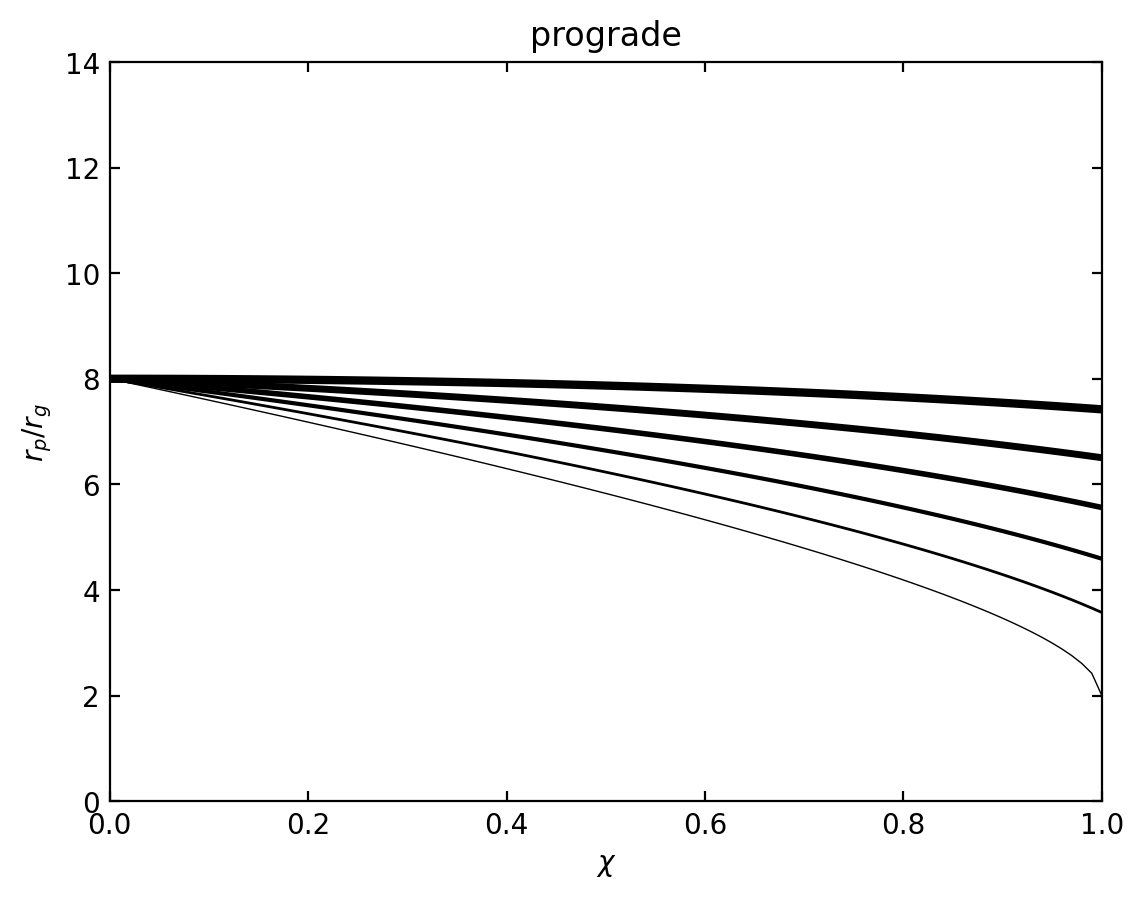

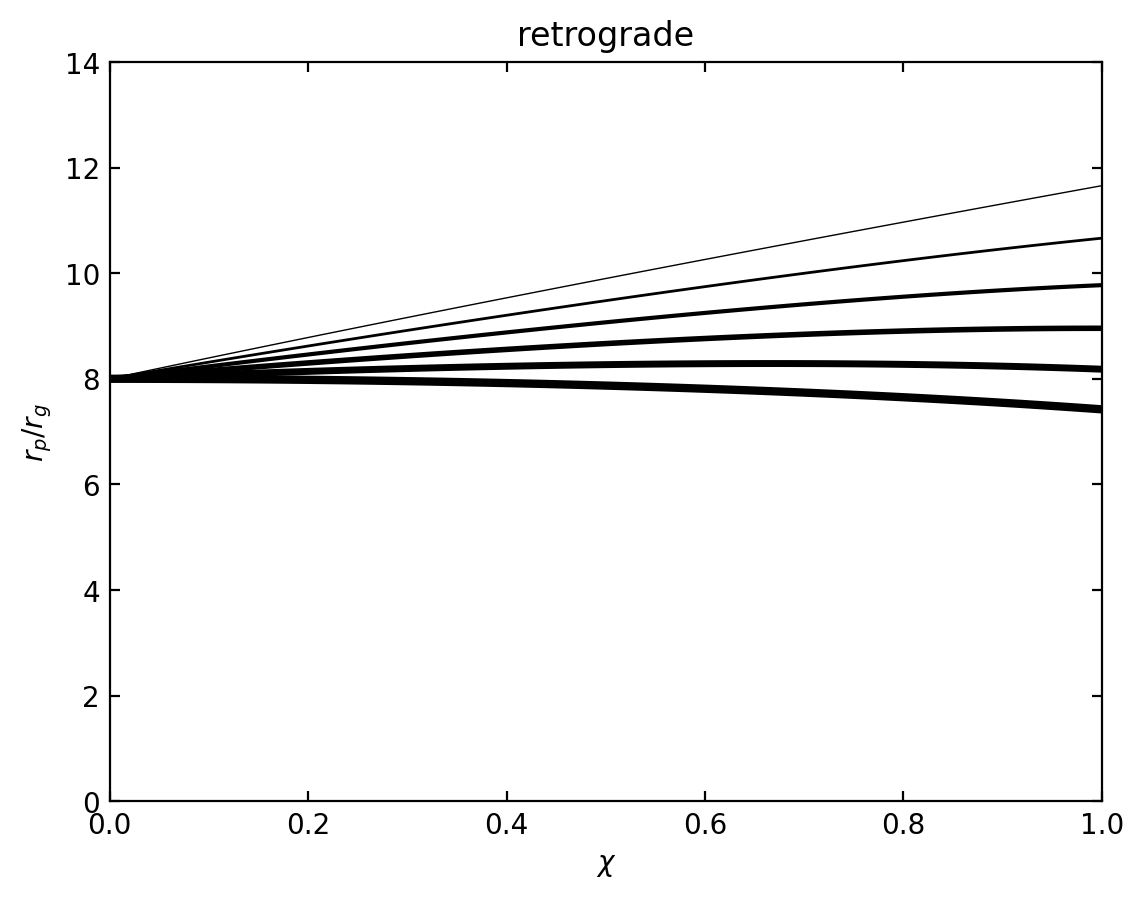

In [63]:
plt.figure(0)
for i in range(len(cosi_space)):
    plt.plot(chi_space, r_pc_full_pro[i], color='k', lw=0.5*(1+i))
    plt.xlim([0, 1])
    plt.ylim([0, 14])
    plt.xlabel(r'$\chi$')
    plt.ylabel(r'$r_p/r_g$')
    plt.title('prograde')

plt.figure(1)
for i in range(len(cosi_space)):
    plt.plot(chi_space, r_pc_full_retro[i], color='k', lw=0.5*(1+i))
    plt.xlim([0, 1])
    plt.ylim([0, 14])
    plt.xlabel(r'$\chi$')
    plt.ylabel(r'$r_p/r_g$')
    plt.title('retrograde')

In [2]:
def setup_disk(N=1000, mass=1e3):
    # initialize a circular disk of N planetesimals
    for i in range(N):
        # choose a random radial location and angle around the orbit
        r = np.random.uniform(0.5, 2.0)
        ff = np.random.uniform(0, 2*np.pi)
        ecc = np.random.uniform(0, 0.9)
        sim.add(
            # set the planetesimal mass so that we get the correct total mass for the disk
            m=mass/N,
            a=r,
            e=ecc,
            f=ff
        )
    return

Running simulation:
................................................................................
....................
Sim time = 0.721 s
Making plots:
................................................................................
....................

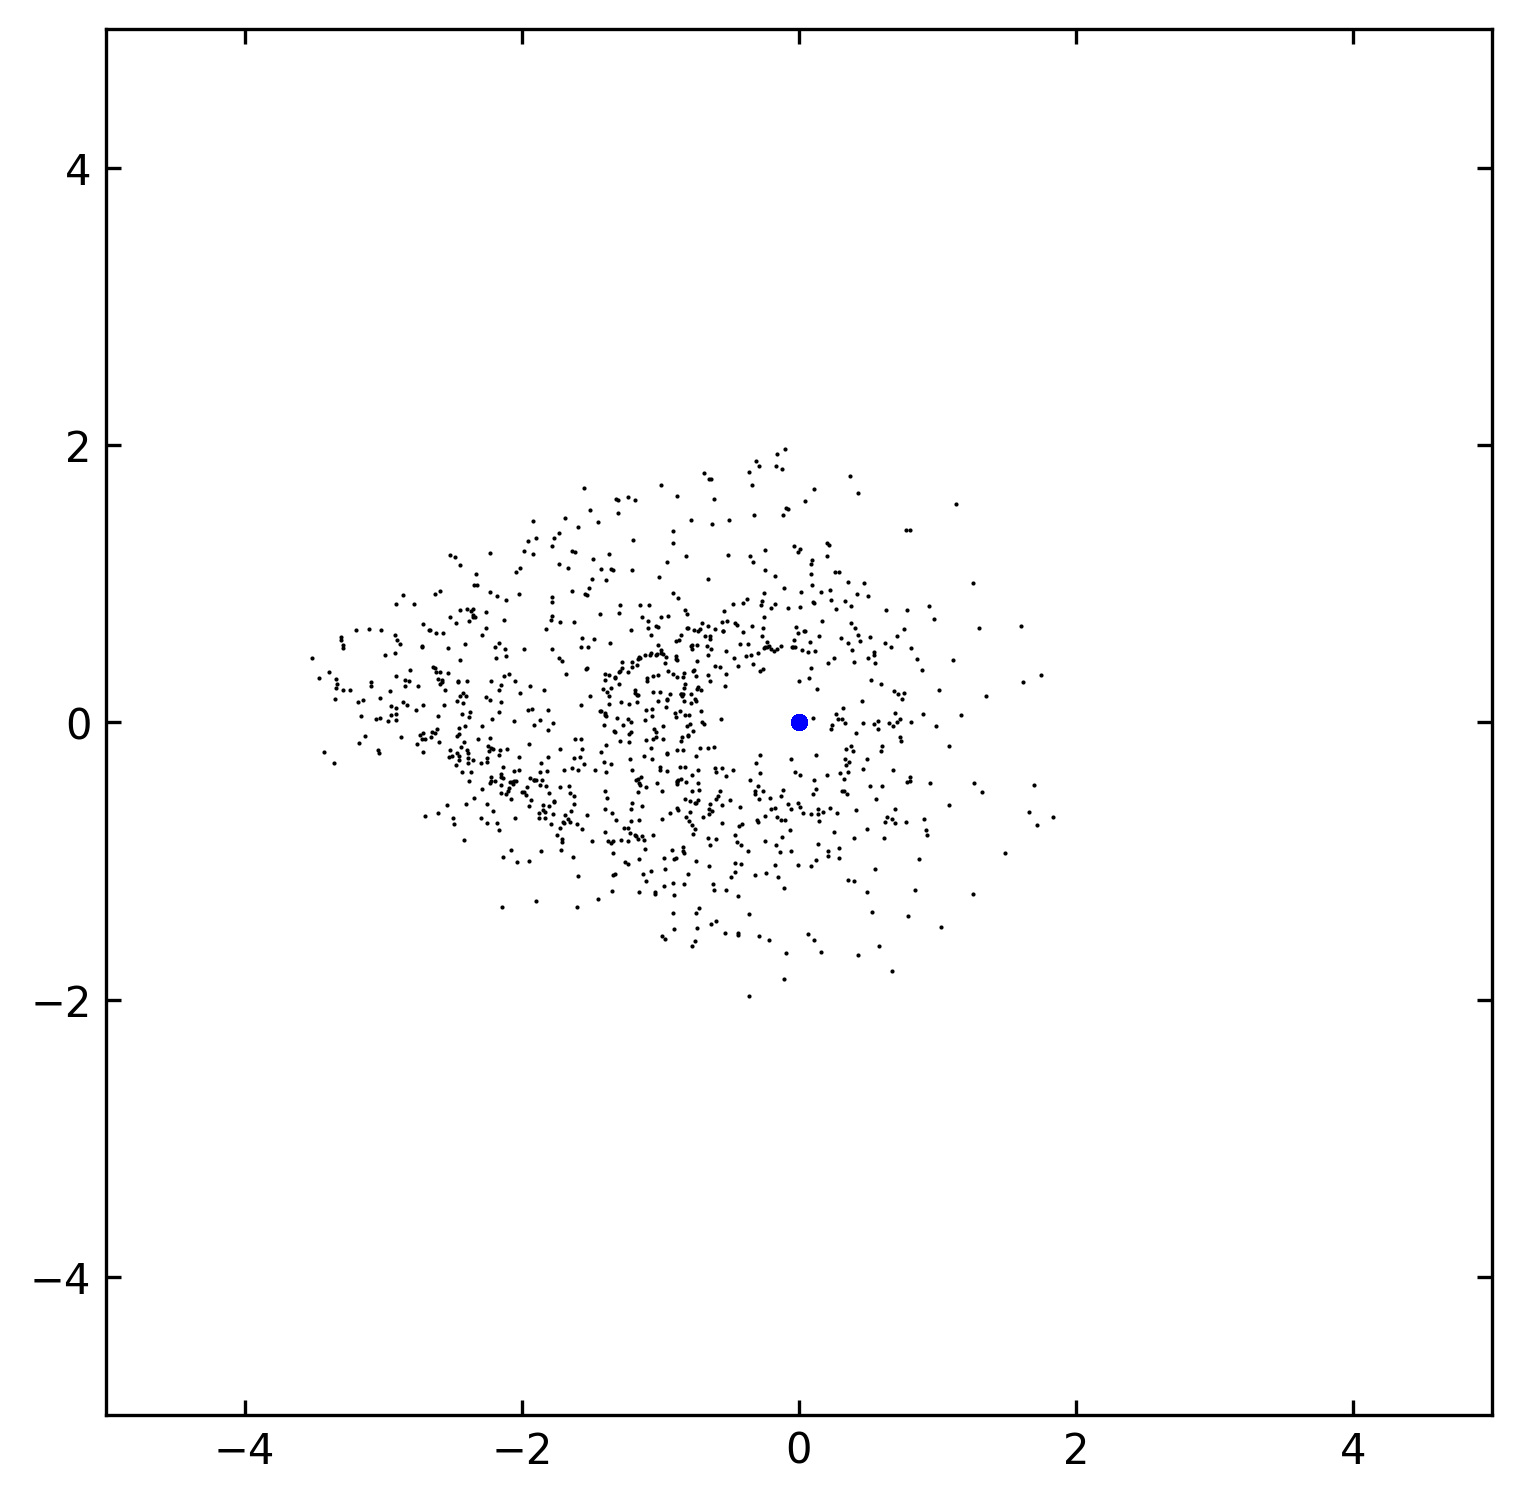


Total time = 3.186 s


In [3]:
start = time.time()

sim = rebound.Simulation()

# start the visualization server: in your browser go to http://localhost:1234
sim.start_server(port=1234)

# use a tree code since we will have many particles
sim.integrator = "leapfrog"
sim.gravity = "tree"
sim.dt = 0.01
# soften the interaction for close approaches
sim.softening = 0.01

# define a box size for the simulation and add "open" boundary conditions
# particles that leave the box will be removed
boxsize = 10
sim.configure_box(boxsize)
sim.boundary = "open"

# Star
# we'll use a hash to label it so we can find it later
sim.add(m=1, hash="smbh")

# Planetesimals
Nparticles = 1000
setup_disk(N=Nparticles, mass=1e-5)

sim.move_to_com()

Noutputs = 100
Norbits = 1

print("Running simulation:")
times = np.linspace(0, Norbits * 2*np.pi, Noutputs)
dt = times[-1]/(Noutputs-1)
xy = np.zeros((Noutputs, Nparticles+1, 2))
xsmbh = np.zeros(Noutputs)
ysmbh = np.zeros(Noutputs)

a_parts = np.zeros((Noutputs, Nparticles+1))
e_parts = np.zeros((Noutputs, Nparticles+1))

for i,t in enumerate(times):
    sim.integrate(t, exact_finish_time=1)
    show_progress(i)
    # store the particle positions
    for j, p in enumerate(sim.particles):
        # store the (x,y) locations of each particle
        xy[i][j] = [p.x, p.y]
    # the star position is included in xy[][] but we'll also store it separately:
    xsmbh[i] = sim.particles["smbh"].x
    ysmbh[i] = sim.particles["smbh"].y

    for p in sim.particles[1:]:
        stars_a = 

# shut down the visualization server; this will stop it complaining next time we run the simulation
sim.stop_server(port=1234)
print('\nSim time = %.3f s' % (time.time()-start,))

# The (x,y) limits for the snapshots
L = boxsize/2

print("Making plots:")
for i,t in enumerate(times):
    show_progress(i)
    
    # plot the current configuration of the particles in the planet's frame
    plt.figure(figsize=(6,6), dpi=150)    
    plt.xlim((-L,L))
    plt.ylim((-L,L))
    
    plt.plot(xy[i,:,0],xy[i,:,1],'ko',ms=1,markeredgewidth=0)
    plt.plot(xsmbh,ysmbh,'bo',ms=3)

    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig('/Users/patrickhorlaville/Downloads/PHYS633/week6/pngs/png2/plot%03d.png' % (i,))
    if i==Noutputs-1: # show the last plot
        plt.show()
    plt.close()

print('\nTotal time = %.3f s' % (time.time()-start,))

# to make a movie you can use:
# images_to_movie.sh 'png/plot%3d.png' movie.mp4

In [7]:
for i in range(len(sim.particles)):
    print(sim.particles[i].m)

1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-08
1e-0